# The van der Pol oscillator

The van der Pol oscillator is the nonlinear version of the harmonic oscillator due to a feedback loop. Its equation of motion is a system of two coupled differential equations of first order, to read
\begin{align}
\dot{x}(t)&=y(t)\\
\dot{y}(t)&=\mu\left(1-x^2(t)\right)y(t)-x(t)
\end{align}
Note: if $\mu=0$ we are back to the harmonic oscillator. So $\mu\left(1-x^2(t)\right)y(t)$ accounts for the feedback loop. Try to rephrase the action of the feedback term in words!

In [1]:
# Load the libraries we make use of
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [5]:
# This function holds the equation of motion. It is needed for odeint and it is a "callable"
def func(r,t):  # The function need exactly two arguments, where r is a list of dependet variables and 
                # t is a list instants in time where we want to have a solution for the r
    mu=0.1                # mu=0.1 adjust feedback loop
    x,y=r                 # cast the input list into two variables
    dxdt=y                # the first equation
    dydt=mu*(1-x**2)*y-x  # the second eqution
    return dxdt,dydt      # return the left hand sides

<IPython.core.display.Javascript object>


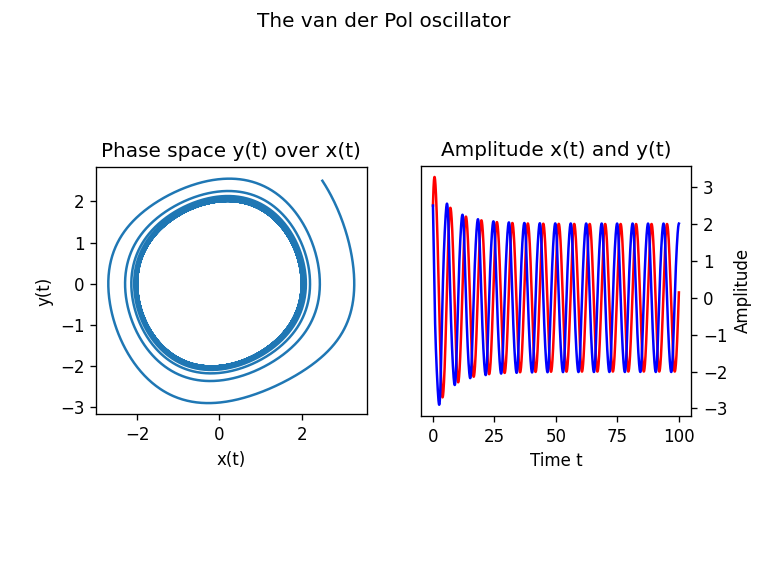

Text(0.5, 0.98, 'The van der Pol oscillator')

In [6]:
%matplotlib notebook
fig, (ax1,ax2) = plt.subplots(1,2) # Let's make two subplot side by side addressed by ax1 ans ax2
# Plot the phase space graph
r0=(2.5,2.5) # this is where we start to integrate, x=2.5 and y=2.5
t=np.linspace(0,100,10000)  # We do 10000 steps in the iterval [0,100]
pos=odeint(func,r0,t) # Integrate the system of differential equations
x=pos[:,0] # Cast the the result of the integration into 
y=pos[:,1] # two array x and y
ax1.set_title('Phase space y(t) over x(t)') # This sets the title of the left plot
ax1.set_aspect(1)       # set the aspect ratio of the graph
ax1.set_xlabel('x(t)')  # the label on the x-axes
ax1.set_ylabel('y(t)')  # the label on the y-axes
ax1.plot(x,y,'-')       # phase space plot, i.e. y(x)
#
ax2.set_aspect(15)      # set the apsect ...
ax2.set_xlabel('Time t')
ax2.set_ylabel('Amplitude')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.plot(t,x,'r')       # plot x(t)
ax2.plot(t,y,'b')       # plot y(t)
ax2.set_title('Amplitude x(t) and y(t)')
fig.savefig('vanderPol.svg', format = 'svg', dpi=300) # save the figure as a vector graphic
fig.savefig('vanderPol.pdf', format = 'pdf') # save it as a pdf
fig.suptitle('The van der Pol oscillator')
#plt.show()